<a href="https://colab.research.google.com/github/Ashriktha/Computer-vision/blob/main/CV_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Screenshot 2026-02-12 091711.png to Screenshot 2026-02-12 091711 (1).png


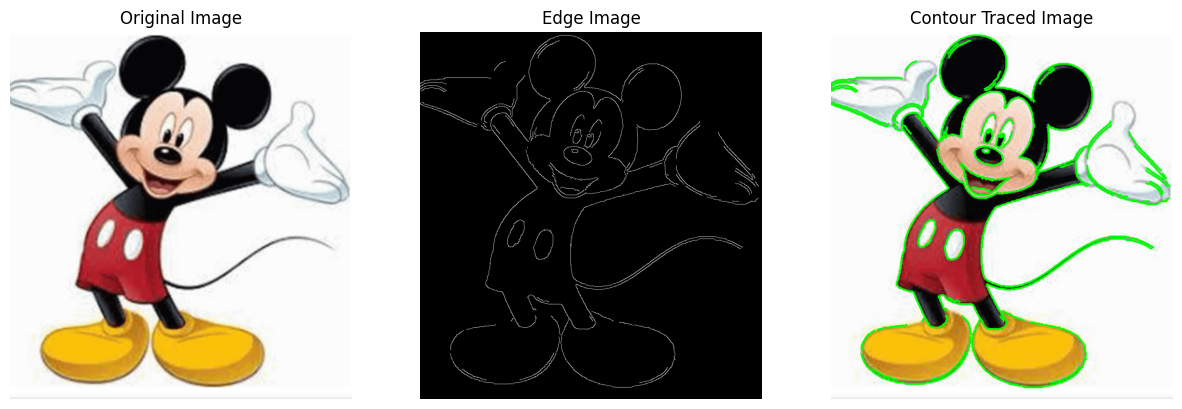

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

img = cv2.imread(list(uploaded.keys())[0])

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

contours, hierarchy = cv2.findContours(edges,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)

contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0), 3)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Edge Image")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Contour Traced Image")
plt.imshow(contour_img)
plt.axis("off")

plt.show()


Saving Screenshot 2026-02-12 095952.png to Screenshot 2026-02-12 095952.png


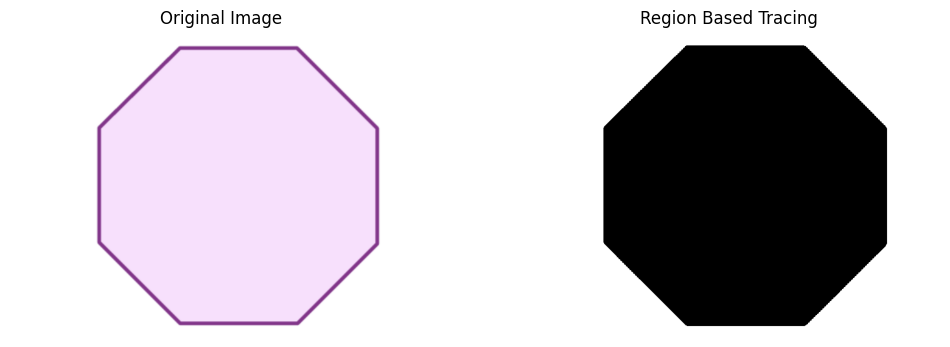

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()


img = cv2.imread(list(uploaded.keys())[0])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def region_growing(img, seed, threshold=10):
    height, width = img.shape
    segmented = np.zeros((height, width), np.uint8)

    seed_value = img[seed]
    stack = [seed]

    while stack:
        x, y = stack.pop()

        if segmented[x, y] == 0:
            if abs(int(img[x, y]) - int(seed_value)) < threshold:
                segmented[x, y] = 255


                if x > 0:
                    stack.append((x-1, y))
                if x < height-1:
                    stack.append((x+1, y))
                if y > 0:
                    stack.append((x, y-1))
                if y < width-1:
                    stack.append((x, y+1))

    return segmented

seed_point = (100, 100)

result = region_growing(gray, seed_point, threshold=15)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Region Based Tracing")
plt.imshow(result, cmap='gray')
plt.axis("off")

plt.show()


Saving Screenshot 2026-02-13 114422.png to Screenshot 2026-02-13 114422.png


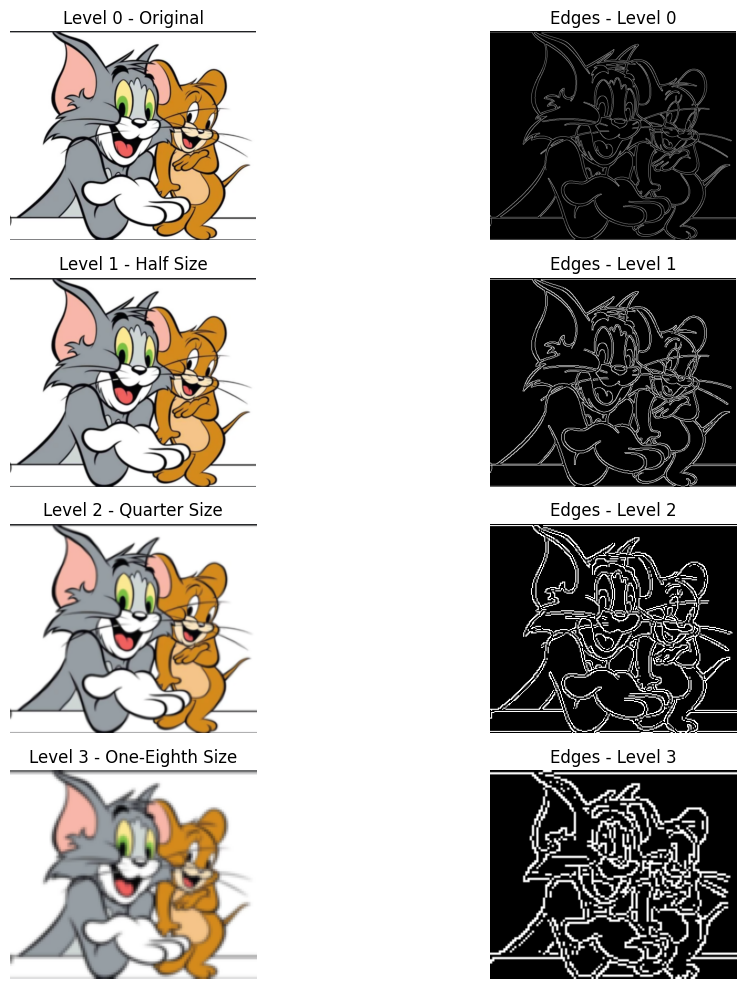

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

image_name = list(uploaded.keys())[0]

img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

level0 = img
level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)


edges0 = cv2.Canny(cv2.cvtColor(level0, cv2.COLOR_RGB2GRAY),100,200)
edges1 = cv2.Canny(cv2.cvtColor(level1, cv2.COLOR_RGB2GRAY),100,200)
edges2 = cv2.Canny(cv2.cvtColor(level2, cv2.COLOR_RGB2GRAY),100,200)
edges3 = cv2.Canny(cv2.cvtColor(level3, cv2.COLOR_RGB2GRAY),100,200)

plt.figure(figsize=(12,10))

plt.subplot(4,2,1)
plt.imshow(level0)
plt.title("Level 0 - Original")
plt.axis("off")

plt.subplot(4,2,2)
plt.imshow(edges0, cmap='gray')
plt.title("Edges - Level 0")
plt.axis("off")

plt.subplot(4,2,3)
plt.imshow(level1)
plt.title("Level 1 - Half Size")
plt.axis("off")

plt.subplot(4,2,4)
plt.imshow(edges1, cmap='gray')
plt.title("Edges - Level 1")
plt.axis("off")

plt.subplot(4,2,5)
plt.imshow(level2)
plt.title("Level 2 - Quarter Size")
plt.axis("off")

plt.subplot(4,2,6)
plt.imshow(edges2, cmap='gray')
plt.title("Edges - Level 2")
plt.axis("off")

plt.subplot(4,2,7)
plt.imshow(level3)
plt.title("Level 3 - One-Eighth Size")
plt.axis("off")

plt.subplot(4,2,8)
plt.imshow(edges3, cmap='gray')
plt.title("Edges - Level 3")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
!pip install opencv-python


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Upload your image


Saving Screenshot 2026-02-12 100958.png to Screenshot 2026-02-12 100958.png


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


100%|██████████| 233M/233M [00:01<00:00, 156MB/s]


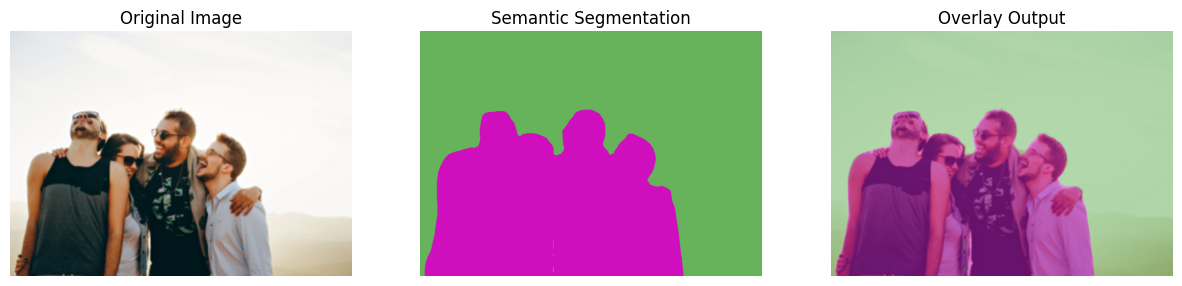

In [ ]:
import torch
import torchvision.transforms as T
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

print("Upload your image")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

image = Image.open(filename).convert("RGB")
image_np = np.array(image)

model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

transform = T.Compose([
    T.Resize(520),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

input_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)['out'][0]

prediction = output.argmax(0).byte().cpu().numpy()

np.random.seed(42)
colors = np.random.randint(0, 255, (21, 3))
color_mask = colors[prediction]

color_mask = Image.fromarray(color_mask.astype('uint8')).resize(image.size)
color_mask = np.array(color_mask)

overlay = (0.5 * image_np + 0.5 * color_mask).astype(np.uint8)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image_np)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Semantic Segmentation")
plt.imshow(color_mask)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Overlay Output")
plt.imshow(overlay)
plt.axis("off")

plt.show()